- Before using time series data for analysis,  
  It is necessary to check basic information  
  such as data collection period and collection cycle, missing values,  
  and change trends over time as follows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' 

### Read file
- raw data name : Corn, Oat, Cereals & Grains Futures Data    
  (Historical data on Cereals and Grains Futures from Yahoo Finance)
- raw data source : kaggle datasets  
  (https://www.kaggle.com/datasets/guillemservera/grains-and-cereals-futures)

In [2]:
df = pd.read_csv('./data/grain_prices/all_grains_data.csv',
                sep=',', encoding='utf-8')

In [3]:
print(df.shape)

df.head()

(34853, 8)


,ticker,commodity,date,open,high,low,close,volume
0,ZC=F,Corn,2000-07-17,182.25,182.25,178.25,179.25,19385
1,ZC=F,Corn,2000-07-18,179.00,183.25,179.00,180.75,25205
2,ZC=F,Corn,2000-07-19,180.00,182.75,178.75,182.00,17126
3,ZC=F,Corn,2000-07-20,181.50,187.00,181.00,186.00,18742
4,ZC=F,Corn,2000-07-21,185.50,188.00,185.00,187.75,16814


In [4]:
df.tail()

,ticker,commodity,date,open,high,low,close,volume
34848,ZS=F,Soybean,2023-09-01,1362.0,1374.0,1355.0,1356.25,422
34849,ZS=F,Soybean,2023-09-05,1359.5,1359.5,1348.0,1349.00,85
34850,ZS=F,Soybean,2023-09-06,1365.5,1365.5,1359.5,1360.25,102
34851,ZS=F,Soybean,2023-09-07,1349.5,1350.0,1345.0,1345.00,310
34852,ZS=F,Soybean,2023-09-08,1339.0,1349.5,1339.0,1349.50,310


### Check basic information
- Since the format of the 'date' column is object,  
  it is converted to datetime format for convenience of analysis.
- The data includes price and transaction volume information for six types of commodities.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34853 entries, 0 to 34852
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     34853 non-null  object 
 1   commodity  34853 non-null  object 
 2   date       34853 non-null  object 
 3   open       34853 non-null  float64
 4   high       34853 non-null  float64
 5   low        34853 non-null  float64
 6   close      34853 non-null  float64
 7   volume     34853 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 2.1+ MB


In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.describe()

,date,open,high,low,close,volume
count,34853,34853.000000,34853.000000,34853.000000,34853.000000,34853.000000
mean,2012-02-13 21:47:37.337962240,573.714353,579.226638,568.351904,573.703187,27612.897742
min,2000-01-03 00:00:00,14.400000,14.410000,14.380000,14.380000,0.000000
25%,2006-05-11 00:00:00,224.500000,226.250000,222.250000,224.250000,78.000000
50%,2012-02-16 00:00:00,435.250000,438.750000,431.500000,435.250000,868.000000
75%,2017-11-27 00:00:00,877.750000,886.500000,869.750000,877.000000,28323.000000
max,2023-09-08 00:00:00,2435.000000,2468.500000,2400.000000,2446.000000,523849.000000
std,NaN,458.812785,463.395105,454.467341,458.840282,52354.714836


In [8]:
df['commodity'].value_counts()

commodity
Rough Rice      5932
Soybean Oil     5805
Corn            5789
Soybean         5781
KC HRW Wheat    5778
Oat             5768
Name: count, dtype: int64

### Check the data collection period.
- Check the data collection period for each commodity.
- It was confirmed that the end date of collection was the same,  
  but the start date of data collection was different for each commodity.
- In the subsequent analysis process,  
  when analyzing each commodity based on the same period,  
  some of the preceding data may need to be cut out.

In [9]:
collect_period = df.groupby('commodity')['date'].agg(['min', 'max'])

collect_period

,min,max
commodity,,
Corn,2000-07-17,2023-09-08
KC HRW Wheat,2000-09-21,2023-09-08
Oat,2000-01-03,2023-09-08
Rough Rice,2000-01-03,2023-09-08
Soybean,2000-09-15,2023-09-08
Soybean Oil,2000-03-15,2023-09-08


### Check the data collection cycle
- Calculate the data collection cycle for each commodity.
- Data collection days(day_of_week) are extracted based on US standard time.
- It was confirmed that the data collection cycle was not constant.
- This means that the occurrence of transactions is not constant, or there are missing values.
- It is necessary to clean the data (e.g. resample weekly or monthly) to a consistent time scale.

In [10]:
df = df.sort_values(by=['commodity', 'date'])

df['date_diff'] = df.groupby('commodity')['date'].diff().dt.days

In [13]:
collect_cycle = df.groupby('commodity')['date_diff'].value_counts().unstack(fill_value=0)

collect_cycle

date_diff,1.0,2.0,3.0,4.0,5.0,6.0,7.0,12.0,14.0,15.0,16.0,17.0,20.0,29.0,38.0,48.0,63.0
commodity,,,,,,,,,,,,,,,,,
Corn,4521,60,1040,161,4,0,0,0,2,0,0,0,0,0,0,0,0
KC HRW Wheat,4525,54,1040,156,2,0,0,0,0,0,0,0,0,0,0,0,0
Oat,4489,66,1018,175,11,1,1,1,0,0,1,0,0,1,1,1,1
Rough Rice,4642,55,1070,160,2,0,0,0,0,0,0,1,1,0,0,0,0
Soybean,4529,51,1040,158,2,0,0,0,0,0,0,0,0,0,0,0,0
Soybean Oil,4509,76,1037,168,7,2,1,1,1,1,0,0,0,0,1,0,0


In [14]:
df['date'] = df['date'].dt.tz_localize('America/New_York')

df['day_of_week'] = df['date'].dt.strftime('%a')

In [15]:
df[df['date_diff']==4]['day_of_week'].value_counts()

day_of_week
Mon    702
Sun    276
Name: count, dtype: int64

### Check trends over time with graphs
- Below, I drew a graph showing how the price(closing price) changed over time.
- In particular, if you look at the second graph  
  that visualizes the data from the beginning of collection(in year 2000),  
  you can intuitively see that the data collection period and cycle are different for each commodity.

In [16]:
pivot_df = df.pivot(index='date', columns='commodity', values='close')

pivot_df.head()

commodity,Corn,KC HRW Wheat,Oat,Rough Rice,Soybean,Soybean Oil
date,,,,,,
2000-01-02 19:00:00-05:00,NaN,NaN,116.75,636.650024,NaN,NaN
2000-01-03 19:00:00-05:00,NaN,NaN,117.00,629.450012,NaN,NaN
2000-01-04 19:00:00-05:00,NaN,NaN,116.75,626.500000,NaN,NaN
2000-01-05 19:00:00-05:00,NaN,NaN,117.00,627.299988,NaN,NaN
2000-01-06 19:00:00-05:00,NaN,NaN,117.25,624.349976,NaN,NaN


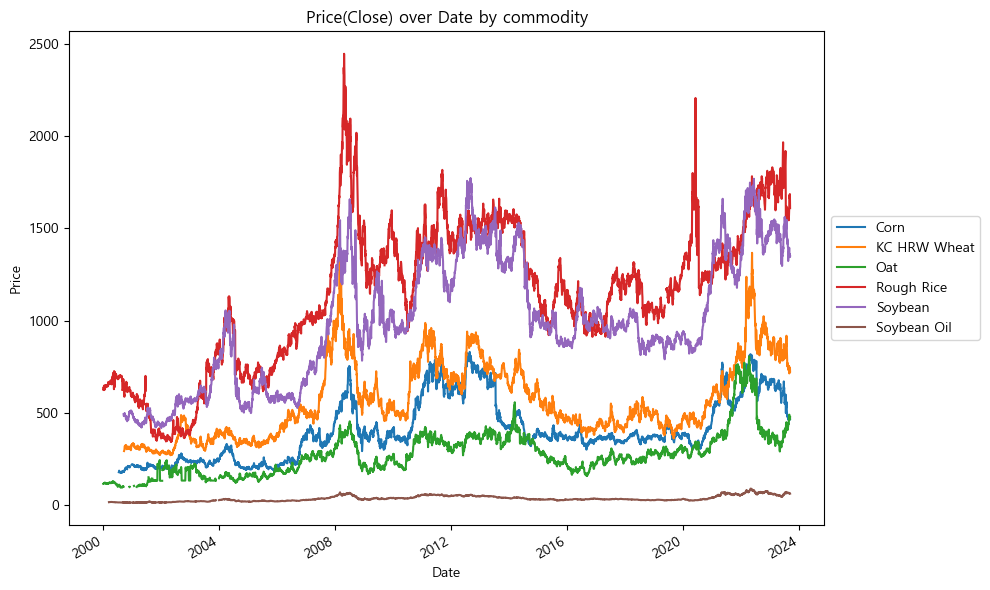

In [17]:
ax = pivot_df.plot(figsize=(10, 6))

ax.set_title('Price(Close) over Date by commodity')
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()

In [18]:
subset_df = pivot_df[pivot_df.index.year <= 2000]

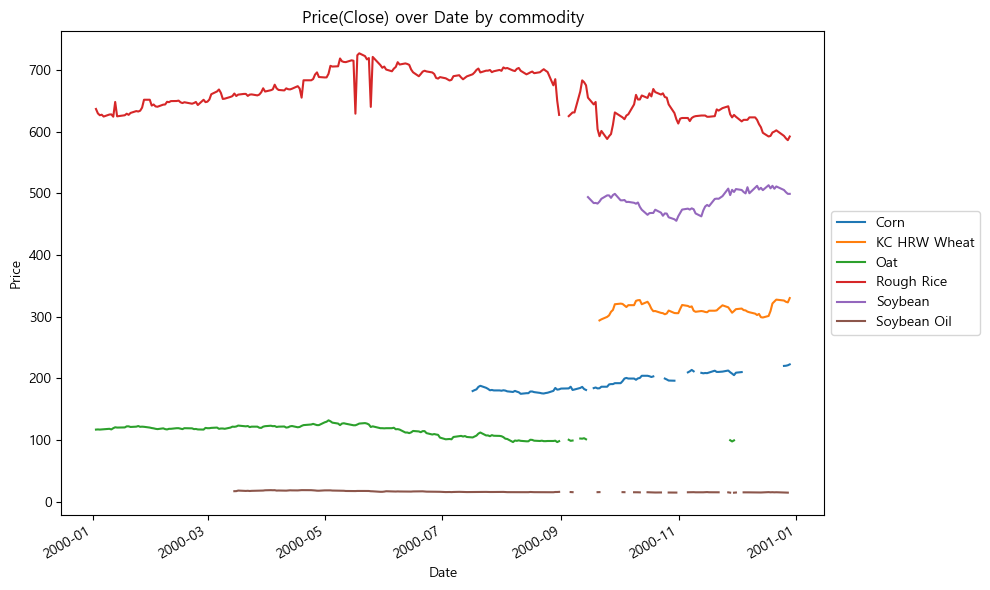

In [19]:
ax = subset_df.plot(figsize=(10, 6))

ax.set_title('Price(Close) over Date by commodity')
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()